In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%run scripts/epsilonGreedy.py
%run scripts/ucb1.py
%run scripts/thompson.py

In [4]:
# AdPushup ads data
# AdPushup = pd.read_csv('./Data-Scientist-Task-Test-data/Data-Scientist-Task-Test-data.csv')
AdPushup = pd.read_csv('./test.csv')

In [5]:
ads = [ i+ str(j) for i in ['A', 'B', 'C', 'D'] for j in range(1, 9)]

In [6]:
def learning(start, end, Ads, ad_data):
    
    for i in range(start, end):
        hit_idx = (np.where(ad_data.ix[i] == 1)[0])
        
        for j in range(0, 32):
            if len(hit_idx) != 0 and j in list(hit_idx):
                Ads.update(j, 1)
            else:
                Ads.update(j, 0)
    
    return Ads

In [7]:
def recommendations(start, end, Ads, ad_data):
    preds = []
    true = []
    
    for i in range(start, end):
        preds.append(Ads.recommend_ad())
        true.append(np.where(ad_data.ix[i] == 1)[0])
    
    return (preds, true)

In [8]:
def calculate_revenue(true, pred):
    correct_count = 0
    for i in range(len(true)):
        if pred[i] in true[i]:
            correct_count += 1
    
    return correct_count
            
def get_average_regret(true, pred):
    revenue_collected = calculate_revenue(true, pred)
    return (len(true) - revenue_collected)

In [9]:
batches = [50, 100, 500, 1000, 5000, 10000, 30000, 50000, 100000, 500000, 999996]

In [10]:
average_regret_random = []

num_examples = 1
Ads_random = EpsilonGreedy(len(ads), 1., 1.)

Ads_random = learning(0, num_examples, Ads_random, AdPushup)
views = Ads_random.get_views()
hits = Ads_random.get_hits()
values = Ads_random.get_values()

for batch in batches:
    
    Ads_random.set_views(views)
    Ads_random.set_hits(hits)
    Ads_random.set_values(values)
    
    pred, true = recommendations(num_examples, (num_examples + batch), Ads_random, AdPushup)
    average_regret_random.append(get_average_regret(true, pred))

In [11]:
average_regret_eps = []

num_examples = 1
eps = EpsilonGreedy(len(ads), 0.2, 1.)

eps = learning(0, num_examples, eps, AdPushup)
views = eps.get_views()
hits = eps.get_hits()
values = eps.get_values()

for batch in batches:
    
    eps.set_views(views)
    eps.set_hits(hits)
    eps.set_values(values)
    
    pred, true = recommendations(num_examples, (num_examples + batch), eps, AdPushup)
    average_regret_eps.append(get_average_regret(true, pred))

In [12]:
average_regret_eps_decreasing = []

num_examples = 1
eps_decreasing = EpsilonGreedy(len(ads), .2, .999)

eps_decreasing = learning(0, num_examples, eps_decreasing, AdPushup)
views = eps_decreasing.get_views()
hits = eps_decreasing.get_hits()
values = eps_decreasing.get_values()

for batch in batches:
    
    eps_decreasing.set_views(views)
    eps_decreasing.set_hits(hits)
    eps_decreasing.set_values(values)
    
    pred, true = recommendations(num_examples, (num_examples + batch), eps_decreasing, AdPushup)
    average_regret_eps_decreasing.append(get_average_regret(true, pred))

In [13]:
average_regret_thompson = []

num_examples = 1
thompson = Thompson(len(ads))

thompson = learning(0, num_examples, thompson, AdPushup)
views = thompson.get_views()
hits = thompson.get_hits()
values = thompson.get_values()

for batch in batches:
    
    thompson.set_views(views)
    thompson.set_hits(hits)
    thompson.set_values(values)
    
    pred, true = recommendations(num_examples, (num_examples + batch), thompson, AdPushup)
    average_regret_thompson.append(get_average_regret(true, pred))

In [14]:
average_regret_ucb1 = []

num_examples = 1
ucb1 = UCB1(len(ads))

ucb1 = learning(0, num_examples, ucb1, AdPushup)
views = ucb1.get_views()
hits = ucb1.get_hits()
values = ucb1.get_values()

for batch in batches:
    
    ucb1.set_views(views)
    ucb1.set_hits(hits)
    ucb1.set_values(values)
    
    pred, true = recommendations(num_examples, (num_examples + batch), ucb1, AdPushup)
    average_regret_ucb1.append(get_average_regret(true, pred))

In [15]:
print 'Random \n', average_regret_random
print 'Epsilon Greedy \n', average_regret_eps
print 'Epsilon Greedy decreasing \n', average_regret_eps_decreasing
print 'Thompson \n', average_regret_thompson
print 'UCB1 \n', average_regret_ucb1

Random 
[50, 98, 495, 990, 4922, 9870, 29555, 49230, 98503, 492757, 985554]
Epsilon Greedy 
[49, 98, 485, 965, 4822, 9664, 29007, 48345, 96739, 483824, 967480]
Epsilon Greedy decreasing 
[49, 98, 485, 965, 4822, 9664, 29007, 48345, 96739, 483824, 967480]
Thompson 
[47, 98, 492, 978, 4920, 9828, 29507, 49181, 98273, 491581, 982906]
UCB1 
[49, 99, 491, 982, 4918, 9851, 29546, 49202, 98441, 492195, 984588]


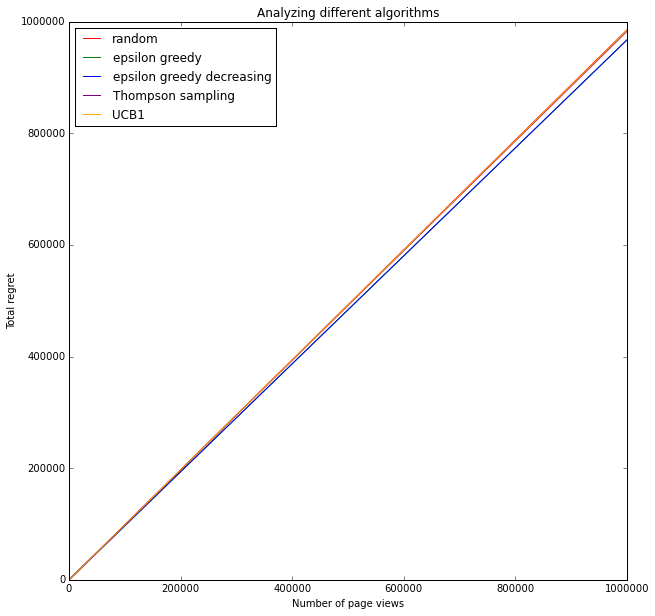

In [18]:
plt.figure(figsize=(10, 10))
plt.plot((batches), average_regret_random, 'r', label='random')
plt.plot((batches), average_regret_eps, 'g', label='epsilon greedy')
plt.plot((batches), average_regret_eps_decreasing, 'b', label='epsilon greedy decreasing')
plt.plot((batches), average_regret_thompson, 'purple', label='Thompson sampling')
plt.plot((batches), average_regret_ucb1, 'orange', label='UCB1')
plt.legend(loc='left')
plt.xlabel('Number of page views')
plt.ylabel('Total regret')
plt.title('Analyzing different algorithms')
plt.show()
plt.close();